# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as p
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

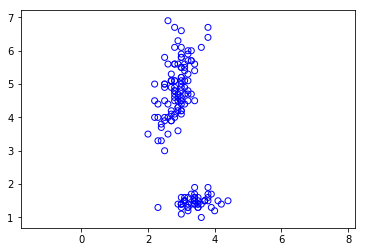

In [2]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [3]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

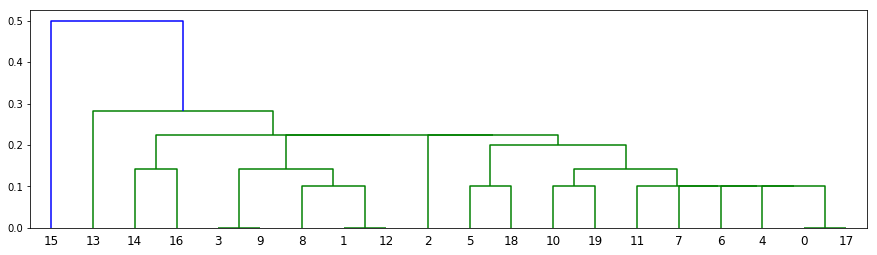

In [4]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

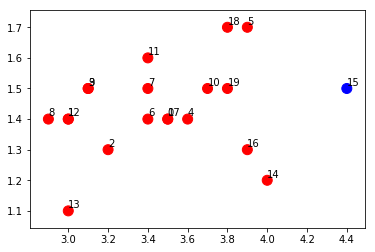

In [5]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

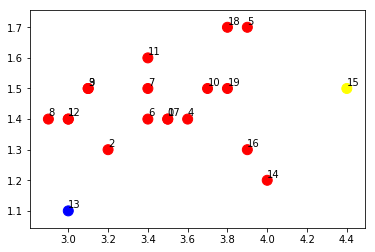

In [6]:
#Question 1 Part 1
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue',"yellow"]
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

### Question 1 Part 1 Answer ###
- As we can see above when we make 3 clusters the algorithm uses the dendogram and basically cuts it where there are 3 clusters which just makes datapoint 13 be it's own cluster rather than before when it was a part of the huge cluster

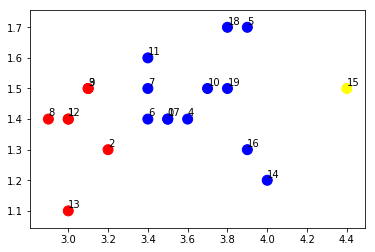

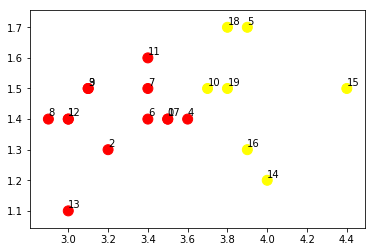

In [16]:
#QUESTION 1 PART 2

# Build a dendrogram using average-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue',"yellow"]
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

# Build a dendrogram using complete-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'complete', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue',"yellow"]
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

### Question 1 Part 2 Answer ###
- As we can see above when we used average linking it will basically take the average metric of all the points in the cluster and use that average point to calulte distance of other points/cluster. Using the average linking we get a similar cluster of 15 being by itself but now get two clusters with more than one point in cluster.
- When we used complete linkage which basically uses the farthest point away to see if point belongs in cluster we see that now even when we tried to create 3 clusters we can only produce 2 clusters with almost evenly split points meaning one cluster is just empty.

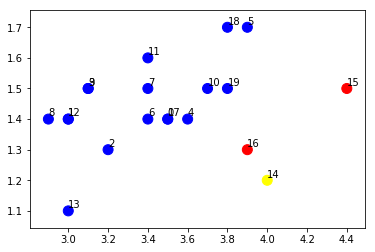

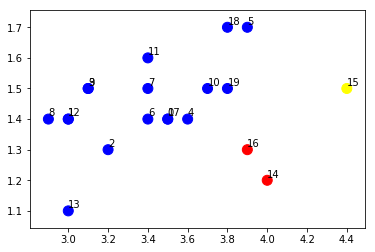

In [7]:
#QUESTION 1 PART 3

# Build a dendrogram using single-linkage clustering and cosine distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'cosine')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue',"yellow"]
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

# Build a dendrogram using single-linkage clustering and cityblock distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'cityblock')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue',"yellow"]
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

### Question 1 Part 3 Answer ###
- Using different methods to actually calulate distance( cityblock and cosine) we see that compared to very first original clusters we do not see much difference other than the fact now that the points being affected by the new distance formulas are 16 and 14 when only 13 was the point that changed before.

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

- After running and testing determined 3 clusters is the best fit.

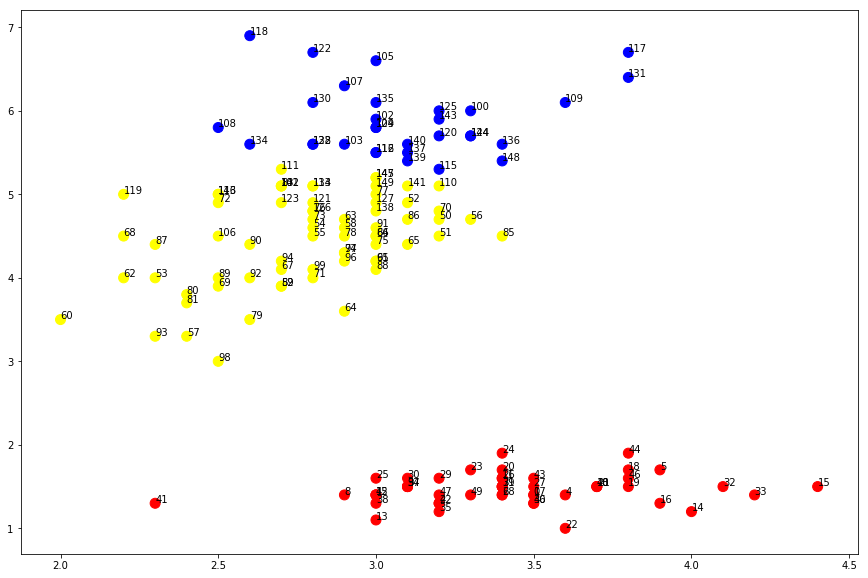

In [21]:
#ANSWER 2
A=range(0,150)
dnew = d[A,1:3]
# Build a dendrogram using average-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
#plt.figure(figsize = (15,4))
#hierarchy.dendrogram(Z);
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize=(15,10))
colors=['red','blue',"yellow"]
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

In [41]:
dnew = d[:,1:3]
# Build a dendrogram using average-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?
- From the cross-tabultion we can see that using 3 cluster withs about 46% of data as we got 50 of type 1 correct and 19 of type 3 correct but we still had 50 think they were type 3 but were actually type 2 and we thought 31 we type 2 but were actually type 3. The clustering did not do the best which could do with the method we choose or the way we calculted distance.

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

In [42]:
# Picks 3 clusters I ALREADY DID THIS
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

# Picks 4 clusters
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

# Picks 5 clusters
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  50  19
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  31  19
5    0  19   0


#### ANSWER 4 ###
* The cross tabulation of 3 clusters we already discussed is not the best but still really good in quessing all of the first type and could be better for the other 2 types.
* Cluster of 4 & 5 are not much better than 3. In 4-clusters, the second cluster contains only 1 data point which shows the cluster itself is not important. In the 5-cluster, the fifth cluster is just takes away data from cluster 4 and does not resolve the two different types of flowers we saw when we had 3 clusters.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.

- The formula I propose is a simple accuracy measure in which you take the sum of the items in the diagonal of the table and divide it by the total number of points(just take sum of entire table) which will give a value from 0 to 1. The closer the value to 1 the better it the clustering it is. This is not the best way as sometimes one kind of error is worth more than other so this formula applies to when the error is the same.

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0  50  14 


With SVD
y    0   1   2
cl            
1   50   4   1
2    0  44  29
3    0   2  20


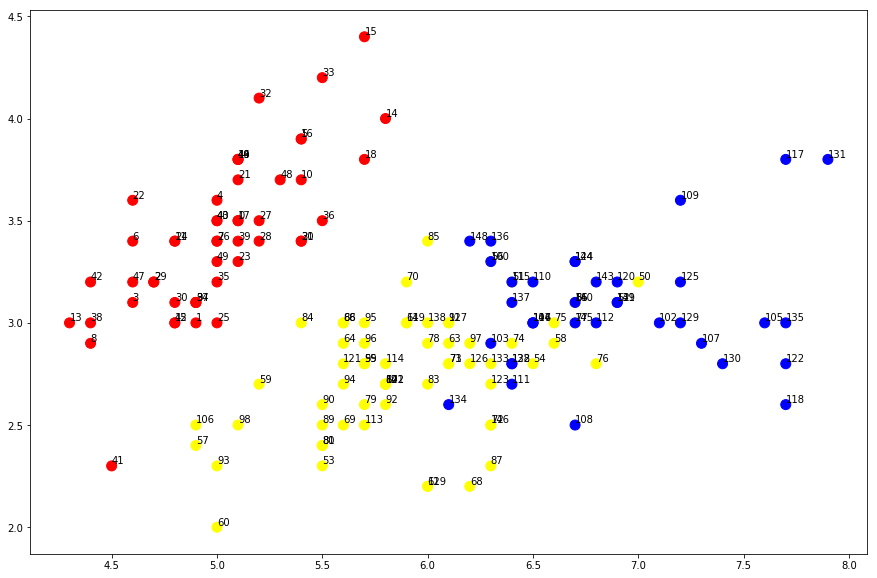

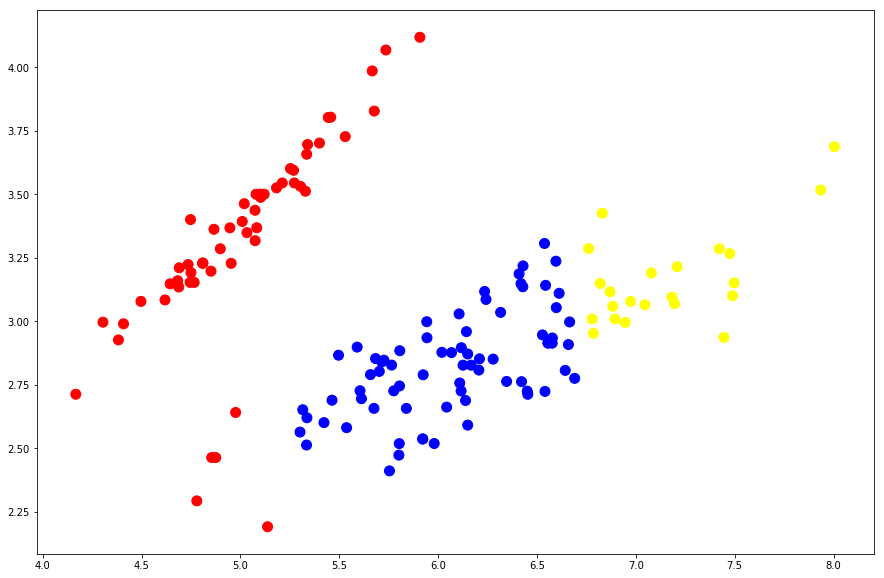

In [45]:
Z = hierarchy.linkage(d,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
A=range(0,150)
plt.figure(figsize=(15,10))
colors=['red','blue', 'yellow']
plt.scatter(d[:,0],d[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
print crosstab(cl, y, rownames=['cl'], colnames=['y']),'\n\n'
for i in A:
    plt.text(d[i,0],d[i,1]+0.01,s=str(i),size=10)

    
#SVD
U,s,V = np.linalg.svd(d,full_matrices=0)
k = 2
dsvd = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
dsvd = dsvd[:, 0:2]

# Clustering
Z = hierarchy.linkage(d2,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

# Plotting
plt.figure(figsize=(15,10))
colors=['red','blue', 'yellow']
plt.scatter(dsvd[:,0],dsvd[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='black')
print "With SVD\n",crosstab(cl, y, rownames=['cl'], colnames=['y'])


### Question 6 Answer 
- Looking at the crosstabulations of the two differnt ways of clusterings we see that just normal clustering still has issures sorting the last two types of flowers into right types with 50 quessing to be type 3 actually being type 2 and 36 quessing being type 2 being type 3. After we did SVD, we see that the new crosstab produces much better clustering as now only a total of 36 flowers were clusterted wrongly which if we compared percentage of accuracy, this clustering was 76% accurate compared to a 43% accuracy.

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0   35   0   0
1    0  26  19
2    0   0  31
3    0  24   0
4   15   0   0


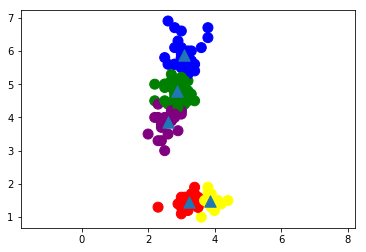

In [40]:
# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])


**Question 7**. Discuss on the quality of outcome of k-means clustering

** ANSWER **
- The quality of k-means clustering is pretty good in splitting the data into certain amount of clusters but as we can see some of the clusters are basically fighting over some of the points like the yellow and red clusters. The problem arises from the fact that we are forcing the algorithmn try to make 5 clusters even though we know there are really only 3. This algorithmn is still good as we could see different clusterings clearly and if needed use this to determine exact number of clusters needed.

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

y    0   1   2
cl            
0   50   0   0
1    0   2  41
2    0  48   9


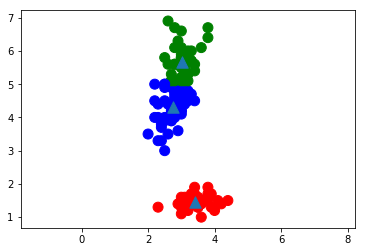

In [43]:
# the following command results in creating of 3 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 3 clusters
cl=kmeans.labels_
# cen are the centers of the 3 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

### Answer 8 
- The results are much better than 5 clusters of the data. From the cross-tabulation it can be seen that each cluster is focused on a single flower type, so it centralizes the data better yet we can see from the cross table that it does  worse compared to hierarchical clustering as now we only have 40 % accuracy yet it shows how the in this data set are not far with very similar results.

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

y    0   1   2
cl            
0    0  38  15
1   50   0   0
2    0  12  35 


SVD
y    0   1   2
cl            
0   50   4   0
1    0  11  34
2    0  35  16


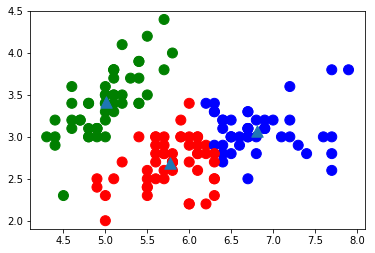

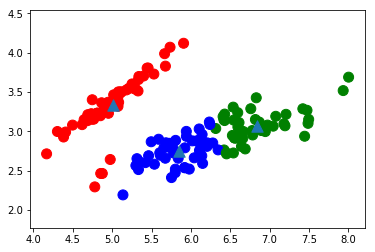

In [49]:
# the following command results in creating of 3 clusters of `d` data
d2=d[:,0:2]
kmeans = KMeans(n_clusters=3, random_state=0).fit(d2)
# cl are the assignments of points to one of the 3 clusters
cl=kmeans.labels_
# cen are the centers of the 3 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue']
plt.figure()
plt.scatter(d2[:,0],d2[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y']),"\n\n"

# the following command results in creating of 3 clusters of `SVDd` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dsvd)
# cl are the assignments of points to one of the 3 clusters
cl=kmeans.labels_
# cen are the centers of the 3 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue']
plt.figure()
plt.scatter(dsvd[:,0],dsvd[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print "SVD\n",crosstab(cl, y, rownames=['cl'], colnames=['y'])


### Answer 9
- The kmeans clustering of the entire data without doing svd is worse than the heiracrhical clustering when we did it in question 6 however the kmeans clustering of the SVD data set is pretty good with a 52% accuracy but it is not as good as the heirachical clustering we did in question 6 which had a 76% accuracy. This is probally due to the fact that this data( specific columns) is not the best for  k-means. Also, heiracrhical is typically a better clustering algorithmn but it usually is more costly.

## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

In [18]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

col_0   1   2   3   4
row_0                
1      26  25  11  36
2       0   0   1   0
3       1   0   0   0


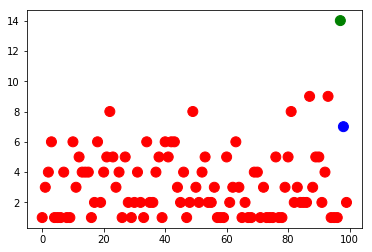

In [52]:
# ANSWER 1 and 2
# Gets 100 random ints
rand100 = np.random.randint(documents.shape[0], size=100)

# Gets 100 random documents
ranDocs = documents[rand100]
ranDocs= np.transpose(ranDocs)

# List of article types
docTypes = newsgroup[rand100]
words = np.sum(ranDocs, axis=0)

# data contain the document with how many words it has
x = range(0,100)
data = np.append([x], [words],0)
data = np.transpose(data)

Z = hierarchy.linkage(data,method = 'single', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

plt.figure()
colors=['red','blue', 'green']
plt.scatter(data[:,0], data[:,1], c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

print crosstab(cl, docTypes)


col_0  1   2  3   4
row_0              
1      4   5  3   5
2      5   4  2   8
3      9   5  3  11
4      9  11  4  12


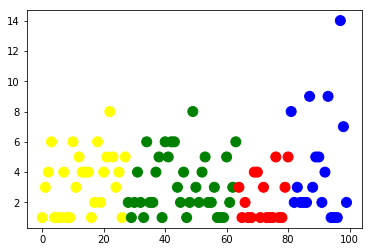

In [59]:
# Answer 3 
# I tried jaccard and cosine yet this produced best
Z = hierarchy.linkage(data,method = 'weighted', metric = 'sqeuclidean')
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')

plt.figure()
colors=['red','blue', 'yellow', 'green']
plt.scatter(data[:,0], data[:,1], c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

print crosstab(cl, docTypes)

### Answer 3
- The best choice of parameters for heirarchical clustering was using the method weighted linkage with the metric squared euclidean distance. Even though this is the best it still is not very accurate as the diagonal is not very high compared to surronding yet it does a better job of quessing other types rather than single euclidean which basically said all documents are type 1.

DocTypes  1  2  3   4
Cluster              
0         6  5  3  11
1         5  9  3   8
2         9  6  3   8
3         7  5  3   9 




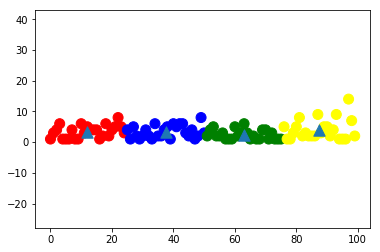

In [61]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
# cl are the assignments of points to one of the 4 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','yellow']
plt.figure()
plt.scatter(data[:,0],data[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, docTypes, rownames=['Cluster'], colnames=['DocTypes']),"\n\n"

### Answer 4 
- K-means clustering did just as well as heirachrical clustering as it quessed about the same amount correctly(slightly better) using 4 clusters as their are only 4 types of documents. Even though it did just as well as heirachrical both methods are not doing the best and could do better.




For N =  200
Heirarchical
col_0   1   2   3   4
row_0                
1      26  16  24  24
2      34  25  17  31
3       0   0   0   1
4       0   0   0   1
5       0   0   0   1


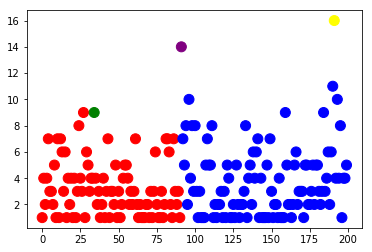

K-Means
DocTypes   1   2   3   4
Cluster                 
0         12   7  10  12
1         14   4  10  13
2         12  11   4  11
3         10  13   4  13
4         12   6  13   9


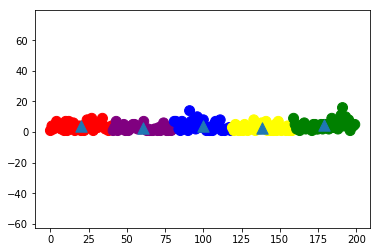




For N =  500
Heirarchical
col_0    1    2   3    4
row_0                   
1      151  105  80  160
2        0    0   1    0
3        0    0   0    1
4        1    0   0    0
5        0    0   0    1


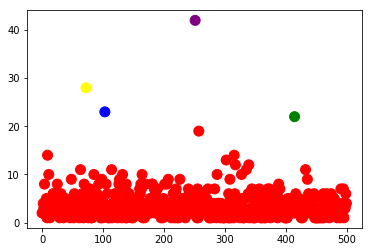

K-Means
DocTypes   1   2   3   4
Cluster                 
0         33  20  13  35
1         33  16  25  25
2         36  17  15  33
3         35  22   9  32
4         15  30  19  37


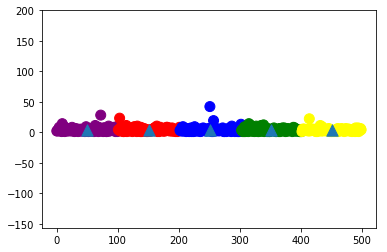




For N =  1000
Heirarchical
col_0    1    2    3    4
row_0                    
1      275  208  167  346
2        0    1    0    0
3        0    0    0    1
4        1    0    0    0
5        0    1    0    0


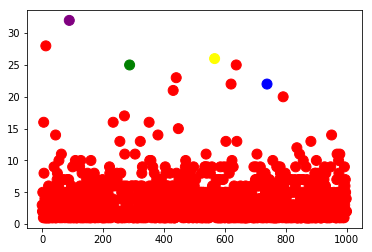

K-Means
DocTypes   1   2   3   4
Cluster                 
0         58  35  35  71
1         54  54  32  60
2         59  46  38  59
3         50  33  29  87
4         55  42  33  70


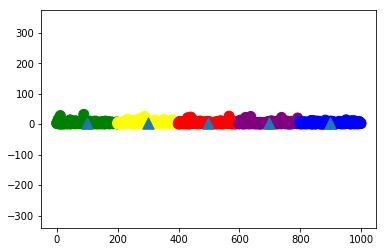




For N =  2000
Heirarchical
col_0    1    2    3    4
row_0                    
1      599  429  312  656
2        1    0    0    0
3        1    0    0    0
4        0    1    0    0
5        0    0    0    1


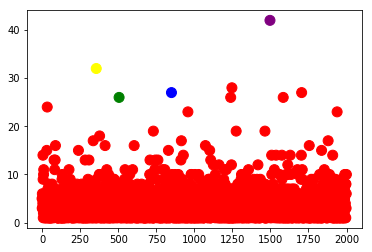

K-Means
DocTypes    1   2   3    4
Cluster                   
0         121  88  62  129
1         128  87  63  122
2         104  93  54  151
3         122  75  70  130
4         126  87  63  125


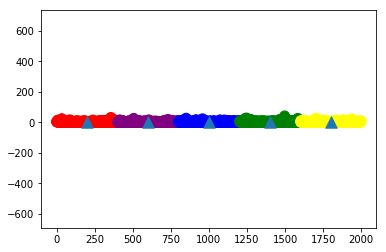




For N =  5000
Heirarchical
col_0     1     2    3     4
row_0                       
1         1     0    1     0
2      1405  1089  782  1719
3         0     1    0     0
4         1     0    0     0
5         1     0    0     0


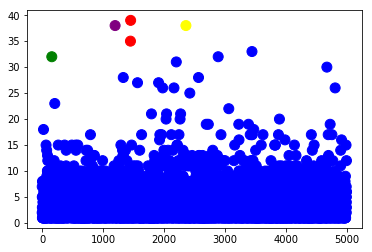

K-Means
DocTypes    1    2    3    4
Cluster                     
0         296  195  161  351
1         268  209  158  369
2         274  216  172  335
3         300  230  146  329
4         270  240  146  335


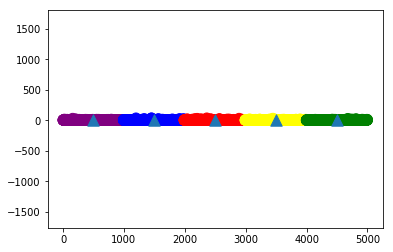

[0.24373102188110352, 0.3002278804779053, 0.2828819751739502, 0.35341310501098633, 0.3644428253173828, 0.3508892059326172, 0.4710831642150879, 0.45003485679626465, 0.7783029079437256, 0.6970691680908203]


In [108]:
#ANSWER 5
from timeit import default_timer as timer
time=[]
N=[200,500,1000,2000,5000]
for i in N:
    rand100 = np.random.randint(documents.shape[0], size=i)
    ranDocs = documents[rand100]
    ranDocs= np.transpose(ranDocs)
    docTypes = newsgroup[rand100]
    words = np.sum(ranDocs, axis=0)
    x = range(0,i)
    data = np.append([x], [words],0)
    data = np.transpose(data)
    start = timer() # start of doing clustering
    Z = hierarchy.linkage(data,method = 'single', metric = 'euclidean')
    cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
    colors=['red','blue', 'green',"yellow","purple"]
    plt.scatter(data[:,0], data[:,1], c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    print "\n\n\nFor N = ",i
    print "Heirarchical\n",crosstab(cl, docTypes)
    plt.show()
    end1 = timer()
    # K MEANS
    kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
    cl=kmeans.labels_
    cen=kmeans.cluster_centers_
    colors=['red','green','blue','yellow','purple']
    plt.scatter(data[:,0],data[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
    plt.axis('equal')
    print "K-Means\n",crosstab(cl, docTypes, rownames=['Cluster'], colnames=['DocTypes'])
    plt.show()
    end2= timer()
    time.append(end1-start)
    time.append(end2-end1)
    
print time

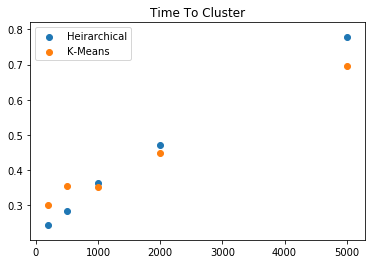

In [109]:
#Number 5
timeHeir=[time[0],time[2],time[4],time[6],time[8]]
timeKMean=[time[1],time[3],time[5],time[7],time[9]]
plt.figure();
plt.scatter(N,timeHeir,label="Heirarchical");
plt.scatter(N,timeKMean,label="K-Means");
plt.legend(loc='upper left');
plt.title("Time To Cluster");


### Answer 5
- For Heirarchical clustering we can see that as N increases the time it takes to cluster increases as well as the plot looks almost like a linear line. K-Means looks to be similar as it always takes longer to calculate but looking at the 5000 time it may end up slowing down meaning for a certain N greater than a huge value it will take roughly same amount of time. We need more huge sets of data and mulitple trials to verify.
- For K-Means Clustering, I noticed the center does not change a bit as in all 5 sizes the centers remain in the same exact location.
- Looking at the crosstables K-Means is better at creating clusters as heirarchical just makes one huge clusters however this could be due to the metrics/methods we used as well as the outliers we have. Looking at the crosstables the quailty of clustering does not really increase.  